In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [16]:
path=r'C:\Users\yukino\jupyter_python\train.csv'

In [17]:
data=pd.read_csv(path)

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
data.info()
# 观察，进行预处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
#筛选无用特征，处理缺失
data.drop(['Cabin','Name','Ticket'],axis='columns',inplace=True)

In [21]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [23]:
data=data.dropna()

In [24]:
data.info()
# 将字符串类型变为数字才能分类

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [30]:
labels=data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

<ipython-input-30-1cbbfb54181a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))


In [29]:
labels

['S', 'C', 'Q']

In [32]:
data["Sex"]=(data["Sex"]=="male").astype("int")

<ipython-input-32-d8ce06f2552d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"]=(data["Sex"]=="male").astype("int")


In [46]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


In [38]:
x=data.iloc[:,data.columns!="Survived"]
y=data.loc[:,'Survived']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=2020)

In [44]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index=range(i.shape[0])
# 纠正索引，因为抽样使序列混乱了

In [52]:
clf = DecisionTreeClassifier(random_state=2020)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score
#分数太低

0.7378277153558053

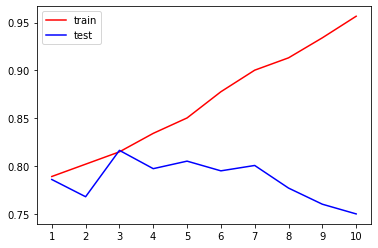

In [58]:
tr = []
te = []
for i in range(10):
    clf=DecisionTreeClassifier(random_state=2020,max_depth=i+1,criterion="entropy")
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label="test")
plt.legend()
plt.xticks(range(1,11))
plt.show()

显然是过拟合，考虑剪枝参数,如何选择参数？-》网格搜索

In [60]:
# 一串参数和这些参数对应的，希望网格搜索搜索的参数的取值范围
parameters = {"criterion":("gini","entropy"),"splitter":("best","random"),"max_depth":[*range(1,10)],
              "min_samples_leaf":[*range(1,50,5)]}
clf = DecisionTreeClassifier(random_state=2020)
GS = GridSearchCV(clf,parameters,cv=10)
# 存在缺点，因为网格搜索无法舍去参数，所以如果有些实际上多余的参数也被输入，得到的结果可能会更差
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [61]:
GS.best_params_#返回最佳组合

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [62]:
GS.best_score_ #在最佳组合下的精确性

0.839247311827957

In [65]:
clf=DecisionTreeClassifier(criterion='gini',
 max_depth= 6,
 min_samples_leaf=6,
 splitter='best')
clf.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6)

In [66]:
clf.score(Xtest,Ytest)

0.7565543071161048